This notebook takes the combined run- and experiment-wide metrics of each sequence-charge, and builds three raw data coordinate estimation models: one each for m/z, RT, and scan.

In [1]:
import pandas as pd
import numpy as np
import sys
import pickle
import glob
import os
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [4]:
def GradientBooster(param_grid, n_jobs, X_train, y_train):
    estimator = GradientBoostingRegressor()
    cv = ShuffleSplit(n_splits=10, train_size=0.8, test_size=0.2, random_state=0)
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    classifier.fit(X_train, y_train)
    print('best estimator found by grid search: {}'.format(classifier.best_estimator_))
    return cv, classifier.best_estimator_


In [5]:
file_sequence_charge_attribs_df = pd.read_pickle('/Users/darylwilding-mcbride/Downloads/experiments/190719_Hela_Ecoli/training-sets/file-sequence-charge-attribs-df.pkl')
file_sequence_charge_attribs_df.iloc[file_sequence_charge_attribs_df['delta_mz_ppm'].abs().argsort()].head(10)

,file_idx,sequence,charge,run_mz,run_scan,run_rt,run_intensity,cv_mz,cv_scan,cv_rt,...,theoretical_mz,experiment_scan,experiment_scan_peak_width,experiment_rt,experiment_rt_peak_width,experiment_intensity,delta_mz,delta_mz_ppm,delta_scan,delta_rt
267747,17,QSTIVCHNR,2,557.774758,841.315474,115.524778,1.343597e+05,3.180908e-07,0.002404,0.000122,...,557.774758,837.547914,32.872857,83.101887,18.154286,1.943157e+05,8.094503e-11,1.451214e-07,0.004498,0.390158
286106,18,TAATLATHELR,2,592.325126,674.460000,340.830000,1.278900e+05,0.000000e+00,0.000000,0.000000,...,592.325126,674.560606,25.465000,334.219323,7.963636,1.065791e+05,4.008598e-10,6.767563e-07,-0.000149,0.019779
15881,1,DIEAQTQKPEPPESAEK,2,948.962876,259.937721,316.290000,2.490950e+04,5.425337e-09,0.000827,0.000000,...,948.962876,263.029326,35.607797,314.822569,12.480339,2.639217e+04,2.448246e-09,2.579918e-06,-0.011754,0.004661
143575,9,YKPESEELTAER,2,726.354276,581.653528,292.855070,1.286512e+06,1.159776e-07,0.000092,0.000338,...,726.354276,588.865406,55.203733,294.961418,7.406400,1.176935e+06,2.596039e-09,3.574067e-06,-0.012247,-0.007141
249029,16,LCDFGVSGQLIDSMANSFVGTR,2,1187.561908,75.048758,1069.580000,9.152200e+04,6.686777e-08,0.006995,0.000000,...,1187.561908,81.425462,62.707381,1071.482574,6.660476,7.175926e+04,-5.329412e-09,-4.487692e-06,-0.078313,-0.001776
20807,1,ILDSVGIEADDDRLNK,3,591.639009,864.424211,567.432224,4.671908e+05,1.148613e-07,0.008888,0.000035,...,591.639009,863.928497,66.562917,565.332838,7.493125,3.417280e+05,2.895831e-09,4.894591e-06,0.000574,0.003714
28860,1,VNQAIWLLCTGAR,2,751.400808,562.590408,823.540000,5.961535e+05,1.654659e-07,0.000675,0.000000,...,751.400808,564.222973,38.370714,824.623617,8.156786,5.601863e+05,-4.242906e-09,-5.646662e-06,-0.002893,-0.001314
296204,19,KYEEIDNAPEER,2,746.849326,591.420000,268.080000,1.721170e+05,0.000000e+00,0.000000,0.000000,...,746.849326,595.584270,33.860800,269.214242,5.652400,6.116099e+05,-4.627509e-09,-6.196041e-06,-0.006992,-0.004213
298257,19,NHAVVCQGCHNAIDPEVQR,2,1102.507840,89.570000,322.000000,5.880000e+04,0.000000e+00,0.000000,0.000000,...,1102.507840,92.077522,47.623864,324.535404,6.549091,5.398864e+04,-8.757752e-09,-7.943483e-06,-0.027233,-0.007812
73624,4,YFAEALGPLQSFQARPDDLLINTYPK,3,989.846543,459.956353,1020.465163,1.044743e+05,1.123035e-07,0.002095,0.000065,...,989.846543,458.853573,67.497273,1024.887487,16.398485,9.636361e+04,-9.771270e-09,-9.871500e-06,0.002403,-0.004315


In [6]:
file_sequence_charge_attribs_df.iloc[file_sequence_charge_attribs_df['delta_mz_ppm'].abs().argsort()].tail(10)

,file_idx,sequence,charge,run_mz,run_scan,run_rt,run_intensity,cv_mz,cv_scan,cv_rt,...,theoretical_mz,experiment_scan,experiment_scan_peak_width,experiment_rt,experiment_rt_peak_width,experiment_intensity,delta_mz,delta_mz_ppm,delta_scan,delta_rt
229830,15,EVLAELEALER,2,636.349227,682.098257,819.27124,166680.5,4.829226e-07,0.000198,0.000012,...,636.345676,682.098257,67.895000,819.271240,12.320000,166680.500000,0.003551,5.580192,0.000000,0.000000
287626,18,VGDGTQDNLSGCEK,2,740.326795,636.450000,251.71000,106710.0,0.000000e+00,0.000000,0.000000,...,740.322658,628.384593,28.140000,250.533085,18.910909,164450.545455,0.004137,5.587876,0.012835,0.004698
129310,8,WSNAGELMELIR,2,709.862446,622.630000,916.20000,179482.0,0.000000e+00,0.000000,0.000000,...,709.858476,619.817202,27.372778,920.642330,16.753889,173283.444444,0.003970,5.592211,0.004538,-0.004825
236231,15,NLTNPNTVIILIGNK,2,812.470417,459.820000,842.77000,175418.0,0.000000e+00,0.000000,0.000000,...,812.475026,459.140676,60.570000,851.905860,10.773333,212883.000000,-0.004609,-5.673112,0.001480,-0.010724
7338,0,LKPEYDIMCK,2,648.823639,680.520000,461.87000,155104.0,0.000000e+00,0.000000,0.000000,...,648.819958,677.344854,37.661667,468.556513,40.845000,198143.583333,0.003681,5.673929,0.004688,-0.014270
148102,10,FDDAVVQSDMK,2,627.790762,711.930000,473.34000,276503.0,0.000000e+00,0.000000,0.000000,...,627.787176,712.930139,37.096190,468.990829,10.815714,278728.809524,0.003586,5.711435,-0.001403,0.009273
237320,15,Q[-17.0265]TDVGITHFR,2,578.794250,765.730000,546.05000,117528.0,0.000000e+00,0.000000,0.000000,...,578.790926,768.716857,28.084444,548.409762,32.425556,108859.888889,0.003324,5.743244,-0.003886,-0.004303
52188,3,IGIFGQDEDVTSK,2,704.847274,626.060000,629.43000,167663.0,0.000000e+00,0.000000,0.000000,...,704.851326,628.721737,31.483333,629.896484,21.346667,172910.000000,-0.004052,-5.748780,-0.004234,-0.000741
15153,1,AVENSSTAIGIR,2,609.324265,756.680000,399.70000,409891.0,0.000000e+00,0.000000,0.000000,...,609.327826,757.810571,41.531000,400.116604,6.027000,449041.400000,-0.003561,-5.844758,-0.001492,-0.001041
210217,14,APEDFSQNWK,2,611.284219,779.800000,475.01000,93375.0,0.000000e+00,0.000000,0.000000,...,611.280376,777.734482,38.903571,471.343507,17.461429,110959.500000,0.003843,6.286107,0.002656,0.007779


In [7]:
file_sequence_charge_attribs_df.file_idx.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [8]:
file_idx = 0

In [9]:
file_sequence_charge_attribs_df[(file_sequence_charge_attribs_df.sequence == 'AAEEEDEADPKR') & (file_sequence_charge_attribs_df.charge == 2)]

,file_idx,sequence,charge,run_mz,run_scan,run_rt,run_intensity,cv_mz,cv_scan,cv_rt,...,theoretical_mz,experiment_scan,experiment_scan_peak_width,experiment_rt,experiment_rt_peak_width,experiment_intensity,delta_mz,delta_mz_ppm,delta_scan,delta_rt
42,0,AAEEEDEADPKR,2,680.304780,735.410000,68.620000,133157.000000,0.000000e+00,0.000000,0.000000,...,680.304776,736.804127,34.0978,81.35568,16.9166,54600.78,0.000004,0.005388,-0.001892,-0.156543
13838,1,AAEEEDEADPKR,2,680.304611,736.900000,98.300000,42599.000000,0.000000e+00,0.000000,0.000000,...,680.304776,736.804127,34.0978,81.35568,16.9166,54600.78,-0.000165,-0.242871,0.000130,0.208275
30181,2,AAEEEDEADPKR,2,680.304569,733.710000,67.630000,138243.000000,0.000000e+00,0.000000,0.000000,...,680.304776,736.804127,34.0978,81.35568,16.9166,54600.78,-0.000207,-0.304235,-0.004199,-0.168712
46236,3,AAEEEDEADPKR,2,680.304811,729.100000,68.460000,130713.000000,0.000000e+00,0.000000,0.000000,...,680.304776,736.804127,34.0978,81.35568,16.9166,54600.78,0.000035,0.050979,-0.010456,-0.158510
60246,4,AAEEEDEADPKR,2,680.304595,736.120000,67.320000,109678.000000,0.000000e+00,0.000000,0.000000,...,680.304776,736.804127,34.0978,81.35568,16.9166,54600.78,-0.000181,-0.266285,-0.000929,-0.172522
74075,5,AAEEEDEADPKR,2,680.305244,735.640000,67.820000,109927.000000,0.000000e+00,0.000000,0.000000,...,680.304776,736.804127,34.0978,81.35568,16.9166,54600.78,0.000468,0.688416,-0.001580,-0.166377
87965,6,AAEEEDEADPKR,2,680.304708,734.380000,66.930000,111055.000000,0.000000e+00,0.000000,0.000000,...,680.304776,736.804127,34.0978,81.35568,16.9166,54600.78,-0.000068,-0.099396,-0.003290,-0.177316
101770,7,AAEEEDEADPKR,2,680.304511,733.088443,115.687735,46343.666667,1.412153e-07,0.000541,0.000041,...,680.304776,736.804127,34.0978,81.35568,16.9166,54600.78,-0.000265,-0.389187,-0.005043,0.421999
116095,8,AAEEEDEADPKR,2,680.305174,733.820000,68.240000,134604.000000,0.000000e+00,0.000000,0.000000,...,680.304776,736.804127,34.0978,81.35568,16.9166,54600.78,0.000398,0.585147,-0.004050,-0.161214
129889,9,AAEEEDEADPKR,2,680.304739,731.630000,69.580000,88890.000000,0.000000e+00,0.000000,0.000000,...,680.304776,736.804127,34.0978,81.35568,16.9166,54600.78,-0.000037,-0.054603,-0.007022,-0.144743


m/z delta estimation model - estimate the m/z delta ppm

In [10]:
X = file_sequence_charge_attribs_df[file_sequence_charge_attribs_df.file_idx == file_idx][['theoretical_mz','experiment_rt','experiment_scan','experiment_intensity']].values
y = file_sequence_charge_attribs_df[file_sequence_charge_attribs_df.file_idx == file_idx]['delta_mz_ppm'].values

In [11]:
np.mean(abs(y))

0.6677198298387145

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [13]:
best_mz_estimator = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
# use the best parameters to train the model
best_mz_estimator.fit(X_train, y_train)
print("R-squared for training set (best model found): {}".format(best_mz_estimator.score(X_train, y_train)))

R-squared for training set (best model found): 0.1556339969211762


In [15]:
# use the trained model to predict the m/z delta ppm for the test set
y_test_predicted = best_mz_estimator.predict(X_test)

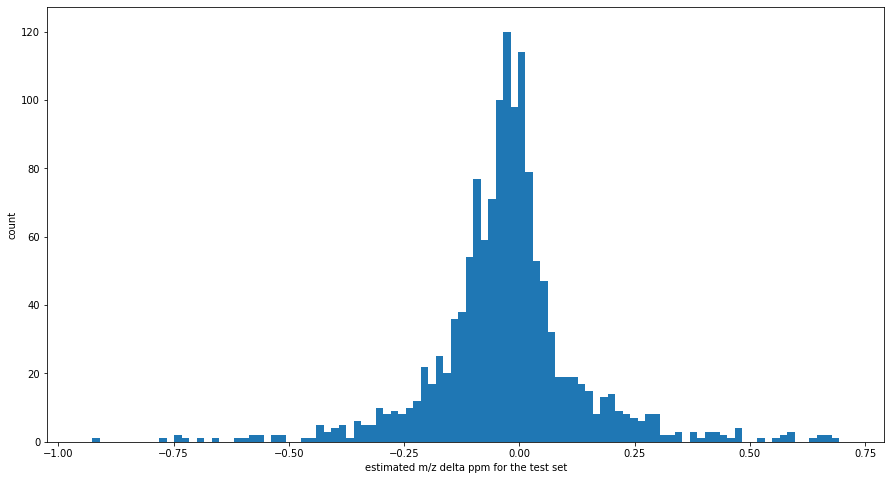

In [16]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 100
hist, bins, _ = plt.hist(y_test_predicted, bins=bins, label='m/z delta')
plt.xlabel('estimated m/z delta ppm for the test set')
plt.ylabel('count')

plt.show()

In [17]:
# save the trained model
with open('/Users/darylwilding-mcbride/Downloads/experiments/190719_Hela_Ecoli/trained-models/file-0-mz-model.pkl', 'wb') as file:
    pickle.dump(best_mz_estimator, file)

scan estimation model - estimate the delta scan

In [18]:
X = file_sequence_charge_attribs_df[file_sequence_charge_attribs_df.file_idx == file_idx][['theoretical_mz','experiment_rt','experiment_scan','experiment_intensity']].values
y = file_sequence_charge_attribs_df[file_sequence_charge_attribs_df.file_idx == file_idx]['delta_scan'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [20]:
best_scan_estimator = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=17, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
# use the best parameters to train the model
best_scan_estimator.fit(X_train, y_train)
print("R-squared for training set (best model found): {}".format(best_scan_estimator.score(X_train, y_train)))

R-squared for training set (best model found): 0.1367351776036424


In [22]:
# use the trained model to predict the scan for the test set
y_test_predicted = best_scan_estimator.predict(X_test)

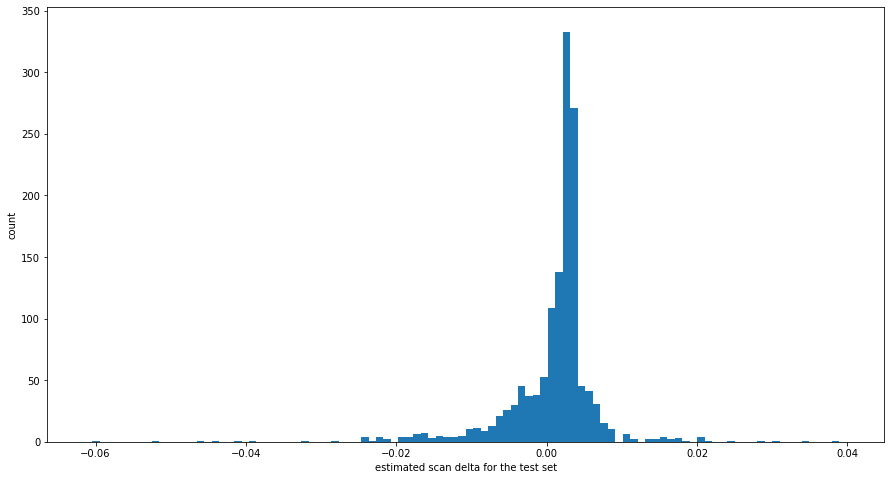

In [23]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 100
hist, bins, _ = plt.hist(y_test_predicted, bins=bins, label='scan delta')
plt.xlabel('estimated scan delta for the test set')
plt.ylabel('count')

plt.show()

In [24]:
# save the trained model
with open('/Users/darylwilding-mcbride/Downloads/experiments/190719_Hela_Ecoli/trained-models/file-0-scan-model.pkl', 'wb') as file:
    pickle.dump(best_scan_estimator, file)

RT estimation model - estimate the RT delta

In [25]:
X = file_sequence_charge_attribs_df[file_sequence_charge_attribs_df.file_idx == file_idx][['theoretical_mz','experiment_rt','experiment_scan','experiment_intensity']].values
y = file_sequence_charge_attribs_df[file_sequence_charge_attribs_df.file_idx == file_idx]['delta_rt'].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [27]:
best_rt_estimator = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=17, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
# use the best parameters to train the model
best_rt_estimator.fit(X_train, y_train)
print("R-squared for training set (best model found): {}".format(best_rt_estimator.score(X_train, y_train)))

R-squared for training set (best model found): 0.6585539914944667


In [29]:
# use the trained model to predict the scan for the test set
y_test_predicted = best_rt_estimator.predict(X_test)

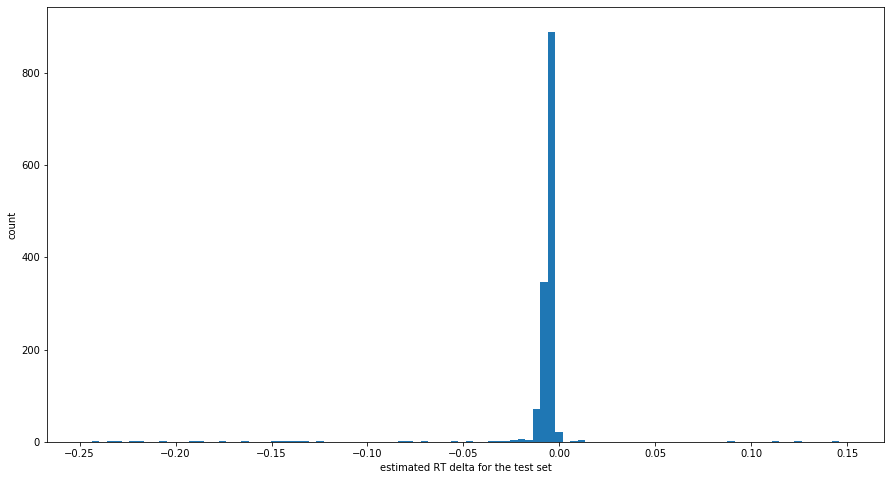

In [30]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 100
hist, bins, _ = plt.hist(y_test_predicted, bins=bins, label='RT delta')
plt.xlabel('estimated RT delta for the test set')
plt.ylabel('count')

plt.show()

In [31]:
# save the trained model
with open('/Users/darylwilding-mcbride/Downloads/experiments/190719_Hela_Ecoli/trained-models/file-0-rt-model.pkl', 'wb') as file:
    pickle.dump(best_rt_estimator, file)